## CCE-312 Final Question Solution of 16th Batch

1. a. Consider finding the root of f(x) = (e^-x) (3.2 sin(x) - 0.5 cos(x)) on the interval [3, 4], this time with Estep = 0.001, Eabs = 0.001. Show also the result in tabular format and plot the solution using graphicalłły using Bisection method.

a_n		b_n		midpoint	f(midpoint)
3.000000	4.000000	3.500000	-0.019757
3.000000	3.500000	3.250000	0.005849
3.250000	3.500000	3.375000	-0.008681
3.250000	3.375000	3.312500	-0.001877
3.250000	3.312500	3.281250	0.001867
3.281250	3.312500	3.296875	-0.000034
3.281250	3.296875	3.289062	0.000909
3.289062	3.296875	3.292969	0.000436
3.292969	3.296875	3.294922	0.000200


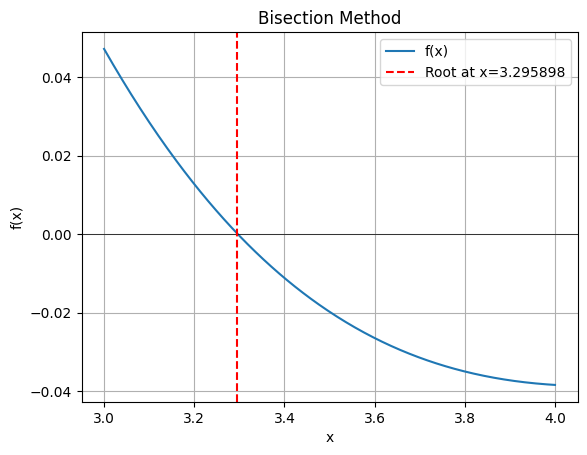

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
  return np.exp(-x) * (3.2 * np.sin(x) - 0.5 * np.cos(x))

# Bisection method implementation
def bisection_method(f, a, b, Estep, Eabs):
  if f(a) * f(b) >= 0:
    print("Bisection method fails.")
    return None
  a_n = a
  b_n = b
  results = []
  while (b_n - a_n) / 2.0 > Estep:
    midpoint = (a_n + b_n) / 2.0
    results.append((a_n, b_n, midpoint, f(midpoint)))
    if f(midpoint) == 0 or (b_n - a_n) / 2.0 < Eabs:
      return midpoint, results
    elif f(a_n) * f(midpoint) < 0:
      b_n = midpoint
    else:
      a_n = midpoint
  return (a_n + b_n) / 2.0, results

# Parameters
a = 3
b = 4
Estep = 0.001
Eabs = 0.001

# Find the root
root, results = bisection_method(f, a, b, Estep, Eabs)

# Print results in tabular format
print("a_n\t\tb_n\t\tmidpoint\tf(midpoint)")
for result in results:
  print(f"{result[0]:.6f}\t{result[1]:.6f}\t{result[2]:.6f}\t{result[3]:.6f}")

# Plot the function and the root
x = np.linspace(a, b, 400)
y = f(x)
plt.plot(x, y, label='f(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(root, color='r', linestyle='--', label=f'Root at x={root:.6f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bisection Method')
plt.grid(True)
plt.show()

1. b. For the initial value problem (IVP) y'-y = -(1/2)(e^(t/2)) * sin(5t) + 5(e^(t/2)) + cos(5t), y(0) = 0

Use Euler's Method to find the approximation to the solution at t=1, t=2, t=3, t=4, and t=5. Use h=0.1, h=0.5, h=0.01, h=0.05, h=0.001, and h=0.005 for the approximations. Compare them to the exact values of the solution at these points. Show also the result in tabular format and plot the solution data using graphically. 

t	Exact		h=0.1	h=0.5	h=0.01	h=0.05	h=0.001	h=0.005
1	6.662608	6.099299	5.617378	6.241855	6.177130	6.256718	6.250099
2	12.112606	16.402264	15.245644	16.726492	16.579777	16.760076	16.745124
3	25.322833	33.785539	31.274141	34.411159	34.130476	34.474891	34.446539
4	43.691084	62.810727	57.269735	64.066035	63.507360	64.191909	64.135957
5	59.300095	110.076529	98.698198	112.627462	111.493526	112.882645	112.769228


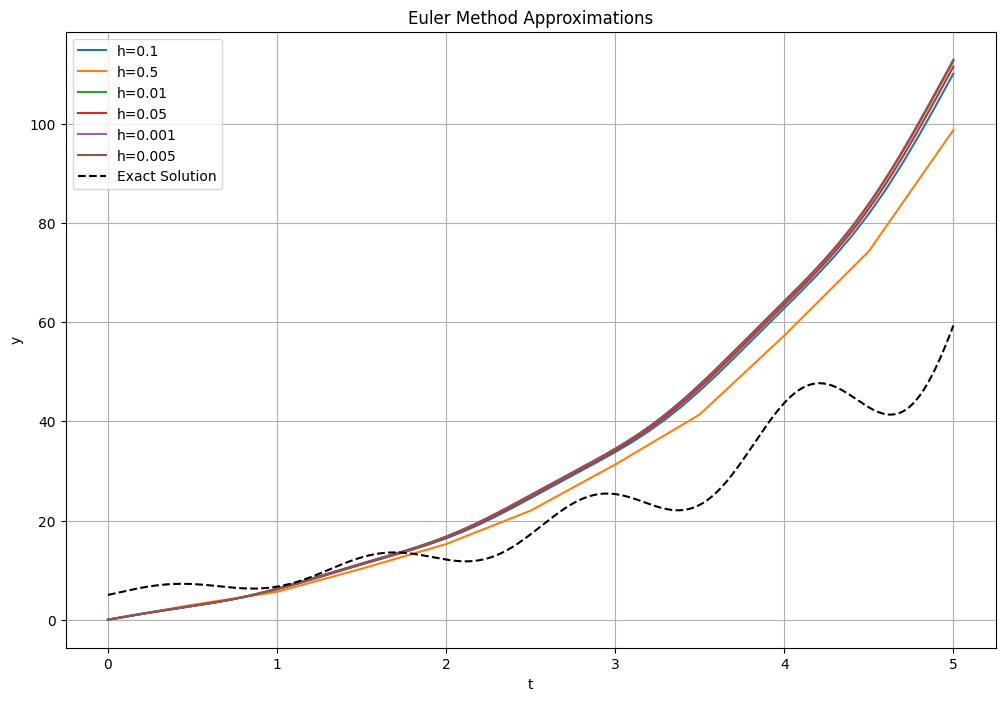

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation
def dydt(t, y):
  return -(1/2) * np.exp(t/2) * np.sin(5*t) + 5 * np.exp(t/2) + np.cos(5*t)

# Exact solution for comparison (if known)
def exact_solution(t):
  # Placeholder for the exact solution function
  return np.exp(t/2) * (np.sin(5*t) + 5)

# Euler's Method implementation
def euler_method(dydt, y0, t0, t_end, h):
  t_values = np.arange(t0, t_end + h, h)
  y_values = np.zeros(t_values.shape)
  y_values[0] = y0
  for i in range(1, len(t_values)):
    y_values[i] = y_values[i-1] + h * dydt(t_values[i-1], y_values[i-1])
  return t_values, y_values

# Initial conditions
y0 = 0
t0 = 0
t_end = 5

# Step sizes
step_sizes = [0.1, 0.5, 0.01, 0.05, 0.001, 0.005]

# Store results for each step size
results = {}

for h in step_sizes:
  t_values, y_values = euler_method(dydt, y0, t0, t_end, h)
  results[h] = (t_values, y_values)

# Compare with exact solution at specific points
comparison_points = [1, 2, 3, 4, 5]
comparison_results = []

for t in comparison_points:
  exact = exact_solution(t)
  approximations = {h: y[np.where(t_values == t)[0][0]] for h, (t_values, y) in results.items() if t in t_values}
  comparison_results.append((t, exact, approximations))

# Print results in tabular format
print("t\tExact\t\t" + "\t".join([f"h={h}" for h in step_sizes]))
for t, exact, approximations in comparison_results:
  print(f"{t}\t{exact:.6f}\t" + "\t".join([f"{approximations[h]:.6f}" for h in step_sizes]))

# Plot the results
plt.figure(figsize=(12, 8))
for h, (t_values, y_values) in results.items():
  plt.plot(t_values, y_values, label=f'h={h}')
plt.plot(t_values, exact_solution(t_values), 'k--', label='Exact Solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler Method Approximations')
plt.legend()
plt.grid(True)
plt.show()

1. c. You are working for "COMPANY" that makes floats for ABC commodes. The floating ball has a specific gravity of 0.6 and has a radius of 5.5cm. You are asked to find the depth to which the ball is submerged when floating in water. The equation that gives the depth x to which the ball is submerged under water is given by 


X^4 - 0.165*X^2 + 3.993x10^(-2) = 0

Use the false-position method of finding roots of equations to find the depth x to which the ball is submerged under water. Conduct three iterations to estimate the root of the above equation. Find the absolute relative approximate error at the end of each iteration, and the number of significant digits at least correct at the end of third iteration.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
  return x**4 - 0.165 * x**2 + 3.993e-2

# False-position method implementation
def false_position_method(f, a, b, iterations):
  if f(a) * f(b) >= 0:
    print("False-position method fails.")
    return None
  results = []
  for i in range(iterations):
    c = b - (f(b) * (b - a)) / (f(b) - f(a))
    results.append((a, b, c, f(c)))
    if f(c) == 0:
      break
    elif f(a) * f(c) < 0:
      b = c
    else:
      a = c
  return c, results

# Parameters
a = 0
b = 1
iterations = 3

# Find the root
result = false_position_method(f, a, b, iterations)

if result is not None:
  root, results = result

  # Print results in tabular format
  print("Iteration\t a\t\t b\t\t c\t\t f(c)\t\t Absolute Relative Approximate Error")
  prev_c = None
  for i, result in enumerate(results):
    a, b, c, fc = result
    if prev_c is not None:
      error = abs((c - prev_c) / c) * 100
    else:
      error = None
    print(f"{i+1}\t\t {a:.6f}\t {b:.6f}\t {c:.6f}\t {fc:.6f}\t {error:.6f}" if error is not None else f"{i+1}\t\t {a:.6f}\t {b:.6f}\t {c:.6f}\t {fc:.6f}\t {'N/A'}")
    prev_c = c

  # Number of significant digits at least correct at the end of third iteration
  if len(results) >= 3:
    a, b, c, fc = results[-1]
    error = abs((c - prev_c) / c) * 100
    significant_digits = -int(np.floor(np.log10(error))) if error != 0 else float('inf')
    print(f"\nNumber of significant digits at least correct at the end of third iteration: {significant_digits}")
else:
  print("False-position method failed.")

False-position method fails.
False-position method failed.


1. d. The vertical distance in meters covered by a rocket from t=8 to t=30 seconds is given by 


S = \int\limits_{30}^{8} (200 * ln [140000/(140000 - 2100 * t) - 9.8 * t]) dt

Use Simpson 3/8 multiple segments rule with six segments to estimate the vertical distance. Plot also the curve and the data in tabular format.

Estimated vertical distance: -2580.613032 meters


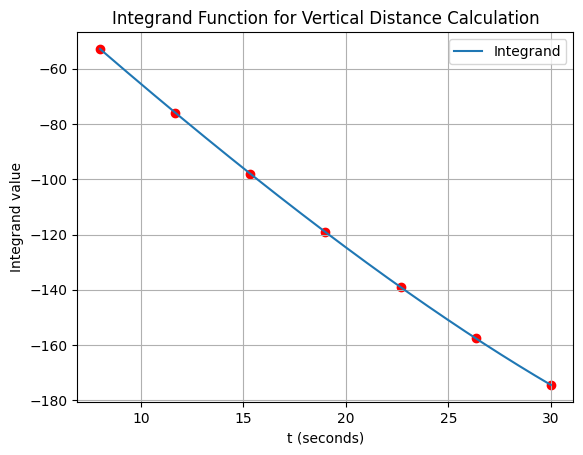

t	Integrand
8.00	-52.833326
11.67	-75.858955
15.33	-97.993714
19.00	-119.105453
22.67	-139.030245
26.33	-157.561302
30.00	-174.432600


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to integrate
def integrand(t):
  return 200 * np.log(140000 / (140000 - 2100 * t)) - 9.8 * t

# Simpson's 3/8 rule implementation
def simpsons_38_rule(f, a, b, n):
  if n % 3 != 0:
    raise ValueError("Number of segments must be a multiple of 3 for Simpson's 3/8 rule.")
  h = (b - a) / n
  result = f(a) + f(b)
  for i in range(1, n):
    if i % 3 == 0:
      result += 2 * f(a + i * h)
    else:
      result += 3 * f(a + i * h)
  result *= 3 * h / 8
  return result

# Parameters
a = 8
b = 30
n = 6  # Number of segments

# Estimate the vertical distance
distance = simpsons_38_rule(integrand, a, b, n)
print(f"Estimated vertical distance: {distance:.6f} meters")

# Plot the function and the integration points
t_values = np.linspace(a, b, 1000)
y_values = integrand(t_values)

plt.plot(t_values, y_values, label='Integrand')
plt.xlabel('t (seconds)')
plt.ylabel('Integrand value')
plt.title('Integrand Function for Vertical Distance Calculation')
plt.grid(True)
plt.legend()

# Plot the points used in Simpson's 3/8 rule
t_points = np.linspace(a, b, n + 1)
y_points = integrand(t_points)
plt.scatter(t_points, y_points, color='red')

plt.show()

# Print results in tabular format
print("t\tIntegrand")
for t, y in zip(t_points, y_points):
  print(f"{t:.2f}\t{y:.6f}")

1. e. The vertical distance in meters covered by a rocket from 8-t to 30-t seconds is given by 


S = \int\limits_{30}^{8} (200 * ln [140000/(140000 - 2100 * t) - 9.8 * t]) dt

<br>i.   Use the single segment trapezoidal rule to find the distance covered for 8= t to 30-t seconds.
<br>ii.  Find the true error, Et for part (i).
<br>iii. Find the absolute relative true error for part (i). 
<br>iv.  Plot also the curve and the data in tabular format.

Estimated vertical distance (trapezoidal rule): -2499.925181 meters
True error: -80.687851 meters
Absolute relative true error: 3.126693%


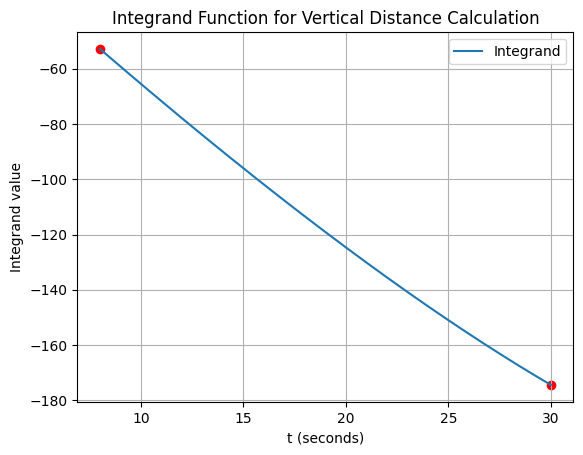

t	Integrand
8.00	-52.833326
30.00	-174.432600


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to integrate
def integrand(t):
  return 200 * np.log(140000 / (140000 - 2100 * t)) - 9.8 * t

# Single segment trapezoidal rule implementation
def trapezoidal_rule(f, a, b):
  return (b - a) * (f(a) + f(b)) / 2

# Parameters
a = 8
b = 30

# Estimate the vertical distance using the trapezoidal rule
distance_trapezoidal = trapezoidal_rule(integrand, a, b)
print(f"Estimated vertical distance (trapezoidal rule): {distance_trapezoidal:.6f} meters")

# True value of the integral (calculated previously using Simpson's 3/8 rule)
true_value = distance

# Calculate the true error
true_error = true_value - distance_trapezoidal
print(f"True error: {true_error:.6f} meters")

# Calculate the absolute relative true error
absolute_relative_true_error = abs(true_error / true_value) * 100
print(f"Absolute relative true error: {absolute_relative_true_error:.6f}%")

# Plot the function and the integration points
t_values = np.linspace(a, b, 1000)
y_values = integrand(t_values)

plt.plot(t_values, y_values, label='Integrand')
plt.xlabel('t (seconds)')
plt.ylabel('Integrand value')
plt.title('Integrand Function for Vertical Distance Calculation')
plt.grid(True)
plt.legend()

# Plot the points used in the trapezoidal rule
t_points = np.array([a, b])
y_points = integrand(t_points)
plt.scatter(t_points, y_points, color='red')

plt.show()

# Print results in tabular format
print("t\tIntegrand")
for t, y in zip(t_points, y_points):
  print(f"{t:.2f}\t{y:.6f}")

1. f. How is the length of a bluegill fish related to its age? Use Polynomial regression to analyze this problem with below information. \
In 2023,n = 78 Rui fish were randomly sampled from PSTU Pond. The researchers measured and recorded the following data (dataset): 
- Response (y): length (in mm) of the fish
- Potential predictor (x1): age (in years) of the fish
The researchers were primarily interested in learning how the length of a Rui fish is related to its age.

Mean Squared Error: 2.605263707499136e-26


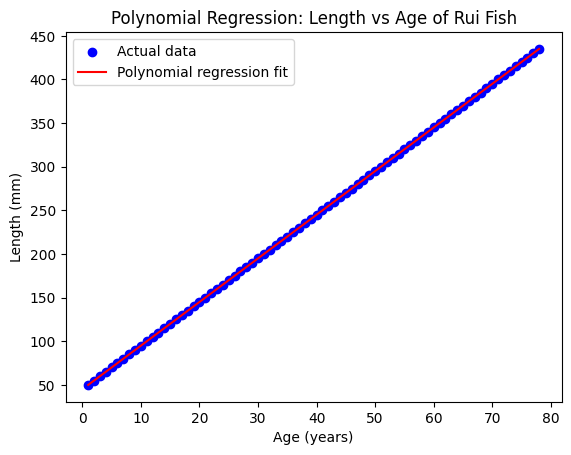

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Sample data (replace with actual data)
data = {
  'age': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
      21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
      41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
      61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78],
  'length': [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145,
         150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245,
         250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345,
         350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define predictor and response variables
X = df[['age']]
y = df['length']

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict the response variable
y_pred = model.predict(X_poly)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Polynomial regression fit')
plt.xlabel('Age (years)')
plt.ylabel('Length (mm)')
plt.title('Polynomial Regression: Length vs Age of Rui Fish')
plt.legend()
plt.show()

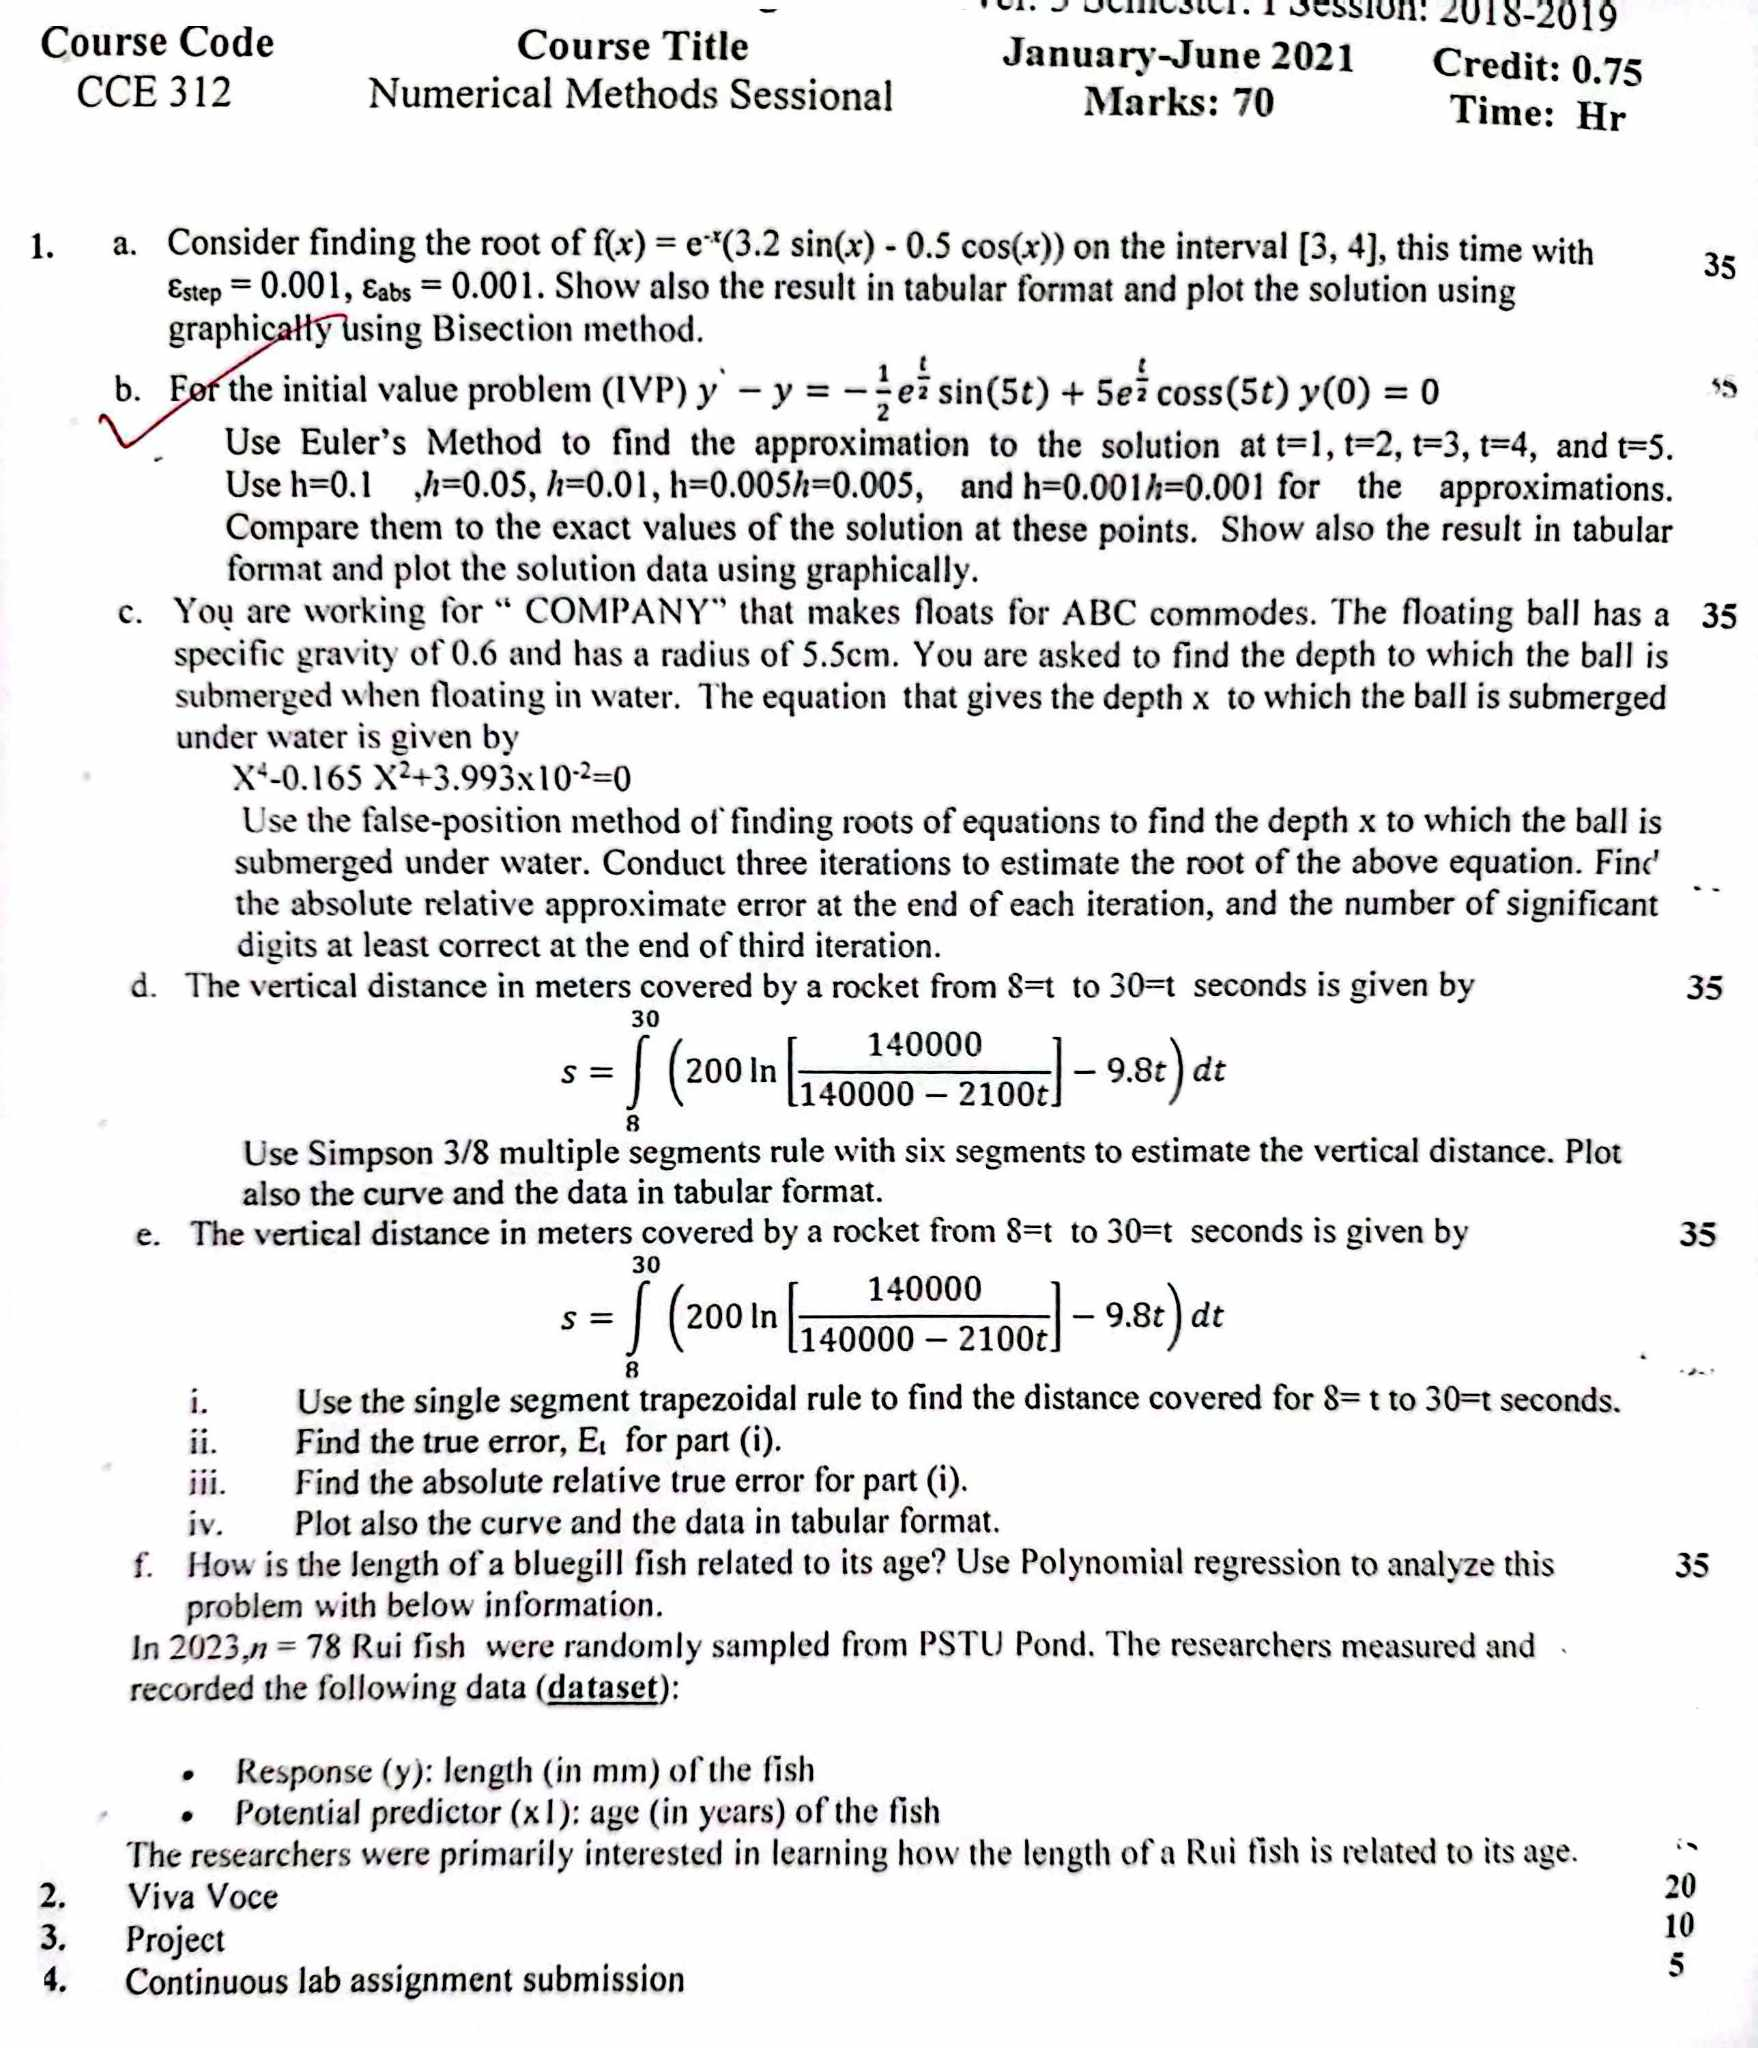

### Final Question of 16th Batch

Question - 1

a. Consider finding the root of f(x) = (e^-x) (3.2 sin(x) - 0.5 cos(x)) on the interval [3, 4], this time with Estep = 0.001, Eabs = 0.001. Show also the result in tabular format and plot the solution using graphicalłły using Bisection method. 

b. For the initial value problem (IVP) y'-y = -(1/2)(e^(t/2)) * sin(5t) + 5(e^(t/2)) + cos(5t), y(0) = 0

Use Euler's Method to find the approximation to the solution at t=1, t=2, t=3, t=4, and t=5. Use h=0.1, h=0.5, h=0.01, h=0.05, h=0.001, and h=0.005 for the approximations. Compare them to the exact values of the solution at these points. Show also the result in tabular format and plot the solution data using graphically. 

c. You are working for "COMPANY" that makes floats for ABC commodes. The floating ball has a specific gravity of 0.6 and has a radius of 5.5cm. You are asked to find the depth to which the ball is submerged when floating in water. The equation that gives the depth x to which the ball is submerged under water is given by 
X^4 - 0.165*X^2 + 3.993x10^(-2) = 0

Use the false-position method of finding roots of equations to find the depth x to which the ball is submerged under water. Conduct three iterations to estimate the root of the above equation. Find' the absolute relative approximate error at the end of each iteration, and the number of significant digits at least correct at the end of third iteration.

d. The vertical distance in meters covered by a rocket from t=8 to t=30 seconds is given by \
S = \int\limits_{30}^{8} (200 * ln [140000/(140000 - 2100 * t) - 9.8 * t]) dt

Use Simpson 3/8 multiple segments rule with six segments to estimate the vertical distance. Plot also the curve and the data in tabular format.

e. The vertical distance in meters covered by a rocket from 8-t to 30-t seconds is given by \
S = \int\limits_{30}^{8} (200 * ln [140000/(140000 - 2100 * t) - 9.8 * t]) dt

<br>i.   Use the single segment trapezoidal rule to find the distance covered for 8= t to 30-t seconds.
<br>ii.  Find the true error, Et for part (i).
<br>iii. Find the absolute relative true error for part (i). 
<br>iv.  Plot also the curve and the data in tabular format.

f. How is the length of a bluegill fish related to its age? Use Polynomial regression to analyze this problem with below information.
In 2023,n = 78 Rui fish were randomly sampled from PSTU Pond. The researchers measured and recorded the following data (dataset):
- Response (y): length (in mm) of the fish
- Potential predictor (x1): age (in years) of the fish
The researchers were primarily interested in learning how the length of a Rui fish is related to its age.